<a href="https://colab.research.google.com/github/SeungHyunKee/Python/blob/main/Scikit_Learn_SeupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 자주 사용할 패키지들은 한번에, 미리 import 해두기

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore') # 문제가되지않는 일반적인 경고는 무시한다

In [4]:
# 사용할 필요한 데이터 데려옴 (보스턴집값데이터 사용)
from sklearn.datasets import load_boston
boston = load_boston()

In [5]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
# 필요한 데이터 발라놓기(가져오기)

data = boston.data  # data = boston['data'] 와 같은 의미임
label = boston.target
columns = boston.feature_names

In [8]:
data = pd.DataFrame(data, columns=columns)
data.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
data.shape # (506, 13) : 전체데이터는 506개, columns는 13개

(506, 13)

In [10]:
# Simple Linear Regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state= 2022) # 20%만 사용하겠다

# Sickit Learn은 데이터가 2차원이어야 한다. 
#  [10,20,30] = (1,)
#  [[10],
#   [20],     = (3,1)  
#   [30]]

In [14]:
# X_train['RM']   # 이 전체중에서 집값인 RM값만 이용하겠다
X_train['RM'].values.reshape(-1,1)[:5] 

# .reshape(-1,1) = 범위를 이렇게 설정해야 처음값부터 시작하고, 마지막 으로 돌아가서 시작?됨
#데이터의 차원을 바꿔주겠다 : (506,1)=변수506개이고, column은 1개

array([[7.454],
       [6.315],
       [6.382],
       [5.942],
       [8.247]])

In [15]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

In [17]:
# 훈련시키기
 # 방의개수"RM" 과 label 값을 학습시킴

sim_lr.fit(X_train['RM'].values.reshape((-1,1)), y_train)

LinearRegression()

In [23]:
# 룸의갯수로 예측

y_pred = sim_lr.predict(X_test['RM'].values.reshape(-1,1))

In [24]:
# 결과 살펴보기
from sklearn.metrics import r2_score     # r2_score패키지 불러와서 R2값 별다른 코딩없이 알수있음
print('단순 선형 회귀, R2: {:.4f}'.format(r2_score(y_test, y_pred)))

#f=float, 실수형으로, :.4f= 전체의 실수 중 소수점 넷째자리까지
# r2_score(y_test, y_pred)에서 (y_test, y_pred)가 score에 영향미친다.(0.21)은 매우 형편없는 수치임

단순 선형 회귀, R2: 0.2121


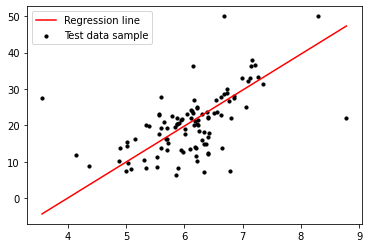

In [27]:
# 결과 시각화하기 :  matplotlib 사용

# x축은 방의갯수, y축은 값price
# 원래 전체 방 갯수(x_Test['RM'])보다 조금더 여유를 줌

line_x = np.linspace(min(X_test['RM']), np.max(X_test['RM']), 10) # 방의개수가 젤 적은것부터 젤 많은것까지의 좌표계가 생성됨, 점의개수는 10개 
line_y = sim_lr.predict(line_x.reshape(-1,1))   # 방의개수에대해 예측한결과가 y에 들어감

plt.scatter(X_test['RM'], y_test, s=10, c='black')  # 이 점들은 black으로 직음
plt.plot(line_x, line_y, c='red')                   # plot이니 선을 그음, 빨간색으로
plt.legend(['Regression line','Test data sample'], loc = 'upper left')  # 빨간색선 기준으로 점들 더 흩어져있을수록 에러

# 결과값보면 거의 예측이 안되는걸 볼수있음

In [28]:
# Multiple Linear Regression
mul_lr = LinearRegression()

# 모델을 학습시킴
mul_lr.fit(X_train, y_train)  # X_train, y_train => 전체column값 다 적용

LinearRegression()

In [33]:
y_pred = mul_lr.predict(X_test)

In [34]:
print('다중 선형 회귀, R2: {:.4f}'.format(r2_score(y_test, y_pred)))
# 결과 : 0.6226으로 앞선 모델보다 정확도는 3배이지만, 여전히 부족하다

다중 선형 회귀, R2: 0.6226


In [40]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(max_depth = 10)   # max_depth=5 : 몇번째까지 tree 내려갈것인가 결정


In [41]:
# 학습시킴
dt_regr.fit(X_train['RM'].values.reshape((-1,1)), y_train) # 학습시켜서 이차원배열로 가져와서, y_train으로 학습시킴

DecisionTreeRegressor(max_depth=10)

In [42]:
# 예측하기
y_pred = dt_regr.predict(X_test['RM'].values.reshape(-1,1))

In [43]:
# 결과
print('단순 결정 트리 회귀 R2: {:4f}'.format(r2_score(y_test, y_pred)))

# 결과값 = linear agression 보다는 조금 높음(max_depth의 값을 증가시키면 결과값은 더 작아짐(낮아짐))
# 값이 이렇게 왔다갔다 튀는 이유 : Decision Tree(의사결정트리) ///
# depth가 높다는것은 학습데이터와 1:1 로 매치된다는것임. test데이터와는 따로놀아(안맞음). 이증상을 overfitting이라고 함

단순 결정 트리 회귀 R2: 0.257860


In [48]:
arr = np.arange(1,11)
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [52]:
best_depth = 0
best_r2 = 0

# 1부터 10까지 반복하는 반복문 만들어서 depth값에 따른 R2값 비교 

for depth in arr:  
  dt_regr = DecisionTreeRegressor(max_depth = depth)
  dt_regr.fit(X_train['RM'].values.reshape((-1,1)), y_train)
  y_pred = dt_regr.predict(X_test['RM'].values.reshape(-1,1))

  temp_r2 = r2_score(y_test, y_pred)
  # print('\n단순 결정 트리 회귀 depth={} R2: {:4f}'.format(depth, temp_r2))

  if best_r2 < temp_r2:
    best_depth = depth
    best_r2 = temp_r2

print('최적의 결과는 depth={} r2={:.4f}'.format(best_depth, best_r2))

최적의 결과는 depth=3 r2=0.3931


In [51]:
# 위의 코드는 'RM' 하나만 사용했지만, 아래부터는 전부 사용하는걸로 작성

dt_regr = DecisionTreeRegressor(max_depth=8)   # 데이터가 조금더 많으면 더 세세하므로, max_depth값 좀더 올려도 정확도 높게 나올수있음
dt_regr.fit(X_train, y_train)

y_pred = dt_regr.predict(X_test)
print('다중 결정 트리 R2: {:.4f}'.format(r2_score(y_test, y_pred)))

다중 결정 트리 R2: 0.7070


In [53]:
# Support Vector Machine Regressor
from sklearn.svm import SVR
svm_regr = SVR(C=2)

svm_regr.fit(X_train['RM'].values.reshape(-1,1), y_train)
y_pred = svm_regr.predict(X_test['RM'].values.reshape(-1,1)) # 예측하기

# 결과 프린트
print('단순 서포트 벡터 머신 회귀 R2: {:.4f}'.format(r2_score(y_test, y_pred)))

단순 서포트 벡터 머신 회귀 R2: 0.3763


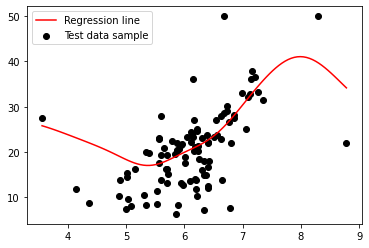

In [55]:
# 결과의 시각화
line_x = np.linspace(np.min(X_test['RM']), np.max(X_test['RM']), 100)  #x축에대한 데이터 만들기
line_y = svm_regr.predict(line_x.reshape(-1,1))  # y축에대한 데이터 만들기

plt.scatter(X_test['RM'], y_test, c='black')
plt.plot(line_x, line_y, c='red')
plt.legend(['Regression line', 'Test data sample'], loc = 'upper left')


In [57]:
svm_regr = SVR(C=20)
svm_regr.fit(X_train, y_train)
y_pred = svm_regr.predict(X_test)
print('다중 서포트 벡터 머신 회귀, R2 : {:.4f}'.format(r2_score(y_test, y_pred)))


# 위의코드 참조해서 최적의 c값 찾기 : for문 이용!

다중 서포트 벡터 머신 회귀, R2 : 0.4234
